In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [4]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
zTS=z500Data.z

In [5]:
z=zTS[((zTS.time.dt.month>11) | (zTS.time.dt.month<2)) & (zTS.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [128]:
zW=z.resample(time="1M").mean()
yW=y.resample(time="1M").mean()


In [129]:
zW

<xarray.DataArray 'z' (time: 446, latitude: 46, longitude: 180)>
array([[[49677.746, 49677.746, 49677.746, ..., 49677.746, 49677.746,
         49677.746],
        [49571.098, 49567.49 , 49563.89 , ..., 49581.297, 49577.836,
         49574.5  ],
        [49473.844, 49465.77 , 49458.047, ..., 49498.53 , 49488.754,
         49481.035],
        ...,
        [57352.57 , 57353.42 , 57357.88 , ..., 57344.383, 57347.367,
         57349.926],
        [57342.047, 57346.62 , 57349.406, ..., 57338.97 , 57339.363,
         57340.293],
        [57340.07 , 57343.363, 57347.24 , ..., 57334.613, 57334.64 ,
         57336.316]],

       [[48134.004, 48134.004, 48134.004, ..., 48134.004, 48134.004,
         48134.004],
        [48003.785, 47989.84 , 47976.02 , ..., 48045.16 , 48031.31 ,
         48017.58 ],
        [47964.82 , 47939.543, 47914.95 , ..., 48043.094, 48015.164,
         47989.57 ],
...
        [57512.895, 57515.42 , 57517.727, ..., 57509.6  , 57508.926,
         57512.13 ],
        [57503.45 , 57505.32 , 57506.26 , ..., 57501.426, 57499.9  ,
         57501.477],
        [57498.93 , 57501.926, 57501.176, ..., 57494.348, 57493.965,
         57495.625]],

       [[50448.473, 50448.473, 50448.473, ..., 50448.473, 50448.473,
         50448.473],
        [50396.035, 50397.77 , 50399.258, ..., 50389.1  , 50391.566,
         50393.953],
        [50424.965, 50432.145, 50438.99 , ..., 50399.566, 50407.08 ,
         50416.145],
        ...,
        [57404.242, 57407.3  , 57408.22 , ..., 57405.207, 57404.047,
         57404.35 ],
        [57392.234, 57395.547, 57400.55 , ..., 57391.105, 57387.777,
         57390.17 ],
        [57389.85 , 57392.504, 57396.26 , ..., 57382.55 , 57382.08 ,
         57385.91 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-12-31 1981-01-31 ... 2018-01-31
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0

In [130]:
#z.time
zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]

#np.corrcoef(yDJ,zDJ)

CC=xr.corr(yDJ, zDJ, dim="time")

In [131]:
CC

<xarray.DataArray (latitude: 46, longitude: 180)>
array([[0.02012799, 0.02012799, 0.02012799, ..., 0.02012799, 0.02012799,
        0.02012799],
       [0.03205763, 0.03257871, 0.03308488, ..., 0.03040056, 0.03097203,
        0.03152029],
       [0.05378633, 0.05499871, 0.05615936, ..., 0.04982427, 0.05119112,
        0.05250795],
       ...,
       [0.37602481, 0.37455641, 0.37454862, ..., 0.38859504, 0.38258568,
        0.37817942],
       [0.37297209, 0.36953243, 0.36900786, ..., 0.38027333, 0.37620658,
        0.37303999],
       [0.36928664, 0.36808244, 0.3669428 , ..., 0.37392177, 0.37233105,
        0.37208609]])
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0

In [132]:
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())


<xarray.DataArray ()>
array(0.44444057)
Coordinates:
    longitude  float32 328.0
    latitude   float32 8.0
<xarray.DataArray ()>
array(-0.20641046)
Coordinates:
    longitude  float32 150.0
    latitude   float32 44.0


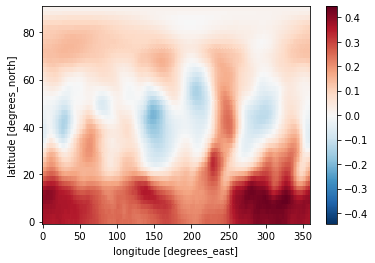

In [133]:
CC.plot()

In [134]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([40,80,120,160,200,240,280,320,360 ], crs=ccrs.PlateCarree())
    ax1.set_yticks([0, 10, 20, 30, 40, 50, 60,70,80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


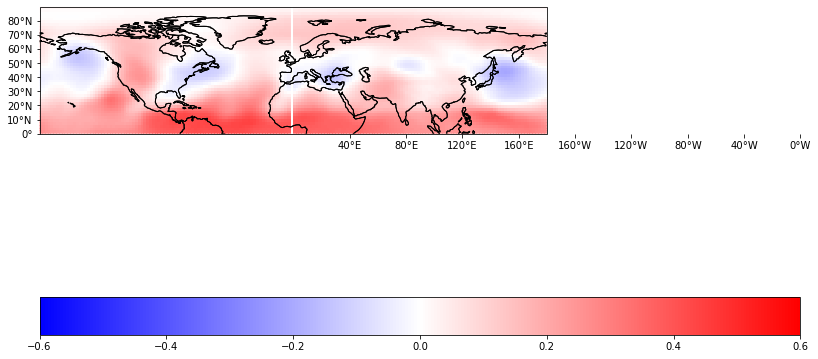

In [135]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

#ax1.set_title(' GFDL All Widespread Fog Days Low Cloud %'+"    "+str(totalCnt) )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)